In [886]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sfa
import statsmodels.api as sma

import warnings
warnings.filterwarnings('ignore')

**Objective is to train a linear regression model which could predict the milege of the car on the basis of following information.**

In [887]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [888]:
# LR model intrepetation when Independent Variable is categorical (mpg~origin)

In [889]:
mpg['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [890]:
# Average milage in each category
mpg.groupby(by=['origin'])['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [891]:
# Lets convert the origin column into number categories by dummy method by taking the average of target column
origin = pd.get_dummies(mpg['origin'],dtype=int,drop_first=True)

In [892]:
origin = sma.add_constant(origin)

In [893]:
origin

,const,japan,usa
0,1.0,0,1
1,1.0,0,1
2,1.0,0,1
3,1.0,0,1
4,1.0,0,1
...,...,...,...
393,1.0,0,1
394,1.0,0,0
395,1.0,0,1
396,1.0,0,1


In [894]:
model = sma.OLS(mpg['mpg'],origin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.54
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.92e-35
Time:                        12:23:01   Log-Likelihood:                -1302.0
No. Observations:                 398   AIC:                             2610.
Df Residuals:                     395   BIC:                             2622.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8914      0.765     36.461      0.000      26.388      29.395
japan          2.5592      1.051      2.436      0.015       0.494       4.625
usa           -7.8079      0.866     -9.018      0.000      -9.510      -6.106
==============================================================================
Omnibus:                       24.959   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.429
Skew:                           0.655   Prob(JB):                     6.71e-07
Kurtosis:                       3.021   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [895]:
# Model

# mpg = 27.8914 + (2.5592)*japan -(-7.8079)*usa


# Europe 0,0
# Japan 1,0
# USA   0,1

In [896]:
27.8914 + 2.5592*(1) - 7.8079*(0)  # japan

30.4506

In [897]:
27.8914 + 2.5592*(0) - 7.8079*(1)  # usa

20.0835

In [898]:
27.8914 + 2.5592*(0) - 7.8079*(0)  # europe

27.8914

In [899]:
# So basically it predicts the avg of target in that category  !!!

In [900]:
# What if the category is not one hot or dummy encoded

mpg.groupby(by=['cylinders'])['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

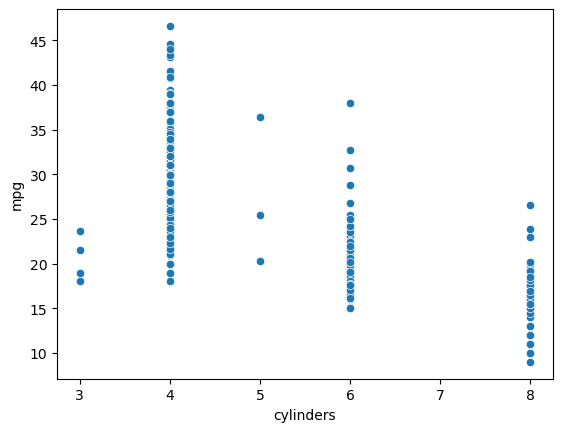

In [901]:
sns.scatterplot(x=mpg['cylinders'],y=mpg['mpg'])
plt.show()

In [902]:
# Regress a line in scatterplot

cylinder = sma.add_constant(mpg['cylinders'])
cylinder

,const,cylinders
0,1.0,8
1,1.0,8
2,1.0,8
3,1.0,8
4,1.0,8
...,...,...
393,1.0,4
394,1.0,4
395,1.0,4
396,1.0,4


In [903]:
model = sma.OLS(mpg['mpg'],cylinder).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.50e-81
Time:                        12:23:02   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9493      0.833     51.557      0.000      41.312      44.587
cylinders     -3.5629      0.146    -24.435      0.000      -3.850      -3.276
==============================================================================
Omnibus:                       39.142   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.841
Skew:                           0.704   Prob(JB):                     2.03e-12
Kurtosis:                       4.124   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [904]:
# model
# y= b + mx
# mpg_data = 42.9493 - 3.5629*cylinders

In [905]:
print(42.9493 - 3.5629*3)
print(42.9493 - 3.5629*4)
print(42.9493 - 3.5629*5)
print(42.9493 - 3.5629*6)
print(42.9493 - 3.5629*8)

32.2606
28.6977
25.134800000000002
21.5719
14.446100000000001


In [906]:
mpg.groupby(by=['cylinders'])['mpg'].mean()  # It is trying to regress the average of each category.

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

<Axes: xlabel='cylinders', ylabel='mpg'>

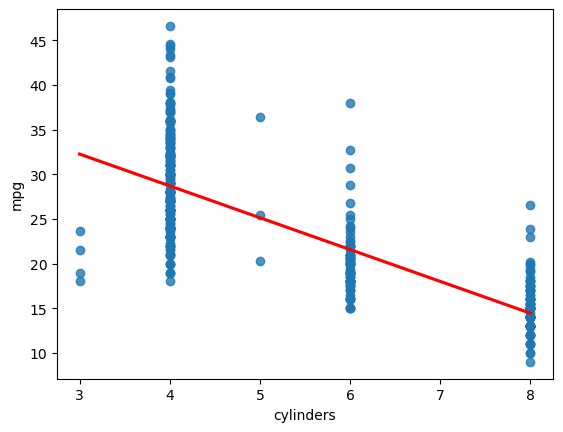

In [907]:
# Visualization in regplot
sns.regplot(x=mpg['cylinders'],y=mpg['mpg'],ci=0,line_kws={'color':'red'})

In [908]:
# Here it regress the model between the average of each category 

## Lets make LR Model on this data

In [909]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


<Axes: >

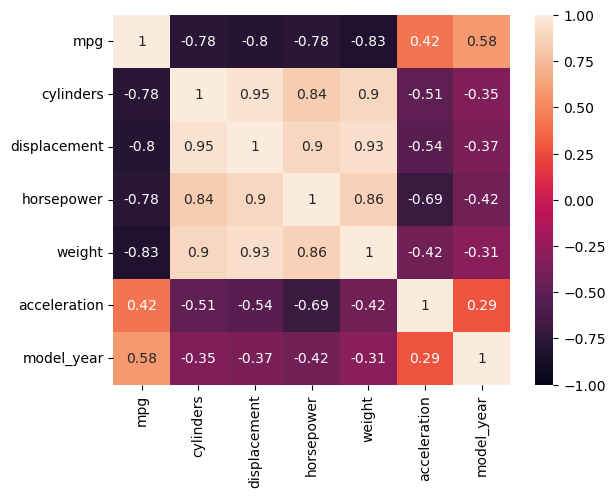

In [910]:
sns.heatmap(mpg.select_dtypes(include = 'number').corr(),vmin=-1,vmax=1,annot=True)

In [911]:
# We have one more category 

mpg.describe(include=object).T

,count,unique,top,freq
origin,398,3,usa,249
name,398,305,ford pinto,6


In [912]:
# Missing values

mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [913]:
mpg[mpg['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [914]:
# Replacing this missing values with middian of this column 

mpg['horsepower'].fillna(mpg['horsepower'].median(),inplace=True)

In [915]:
# Dummy Encoding --> origin

In [916]:
# Lets first encode name column

mpg['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [917]:
mpg['name'].str.split(expand=True)

,0,1,2,3,4,5
0,chevrolet,chevelle,malibu,None,None,None
1,buick,skylark,320,None,None,None
2,plymouth,satellite,None,None,None,None
3,amc,rebel,sst,None,None,None
4,ford,torino,None,None,None,None
...,...,...,...,...,...,...
393,ford,mustang,gl,None,None,None
394,vw,pickup,None,None,None,None
395,dodge,rampage,None,None,None,None
396,ford,ranger,None,None,None,None


In [918]:
mpg['brand'] = mpg['name'].str.split(expand=True).iloc[:,0]

In [919]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford


In [920]:
mpg['brand'].value_counts()

brand
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: count, dtype: int64

In [921]:
mpg['brand'].value_counts()[:10]  # Lets keep the top 10 brands and rest make others ( binning the data)

brand
ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: count, dtype: int64

In [922]:
top_10 = mpg['brand'].value_counts()[:10].index
top_10

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen'],
      dtype='object', name='brand')

In [923]:
def brands(brand):
    if brand not in top_10:
        return 'others'
    else:
        return brand

In [924]:
mpg['brand'] = mpg['brand'].apply(brands)

In [925]:
map_dict = mpg['brand'].value_counts().to_dict()

In [926]:
mpg['brand'] = mpg['brand'].map(map_dict)

In [927]:
del mpg['name']

In [928]:
mpg['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [929]:
mpg = pd.get_dummies(mpg,dtype=int)
del mpg['origin_usa']

In [930]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,brand,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,43,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,17,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,31,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,28,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,51,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,51,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,121,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,28,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,51,0,0


* Horsepower 
* There is a term called : Power to weight ratio of a car
* Horsepower divided by the weight of a car 

* To remove multicolinearity lets 

mpg['power_to_weight'] = mpg['horsepower']/mpg['weight']
mpg.drop(columns = ['horsepower','weight'],inplace=True)

* lets drop the cylinder column compare to displacment it will be better to take number column and drop category column .

mpg.drop(columns = ['cylinders'],inplace=True)

* lets see the multicolinearity between the accelartion and power_to_weight

sns.heatmap(mpg.corr(),vmax=1,vmin=-1,annot=True)

* As there is multicolinearity between acceleration and power_to_weight
and by making the new column power_to_weight it is not showing that good correlation so we can drop these
both column and check weither the multicollinearity removes or not. 

mpg.drop(columns = ['acceleration','power_to_weight'],inplace=True)

In [931]:
# Again there is no improvement in multicollinearity lets do one thing 
# Lets take the sum of all mullticollinearity and make new columns name as Engine Para

mpg['Engine para'] = mpg['horsepower']+mpg['weight']+mpg['cylinders']+mpg['displacement']+mpg['acceleration']
mpg.drop(columns = ['horsepower','weight','cylinders','displacement','acceleration'],inplace=True)

## Build a base model

In [932]:
# Lets split this data 
from sklearn.model_selection import train_test_split

x= mpg.drop(columns = ['mpg'])
y= mpg['mpg']

In [933]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=3)

In [934]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(318, 5) (318,) (80, 5) (80,)


In [935]:
# Assumption 1 : Target is number  : Met
# Assumption 2 : Multicollinierity : Not Met

In [936]:
# Check for Multicollinierity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_list = []

for i in range (x_train.shape[1]):
    vif_list.append(variance_inflation_factor(x_train.values,i))
    
pd.DataFrame({'Feature Names ':x_train.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Names,VIF
0,model_year,22.600796
4,Engine para,17.395331
1,brand,3.812963
2,origin_europe,2.130789
3,origin_japan,1.990414


<Axes: >

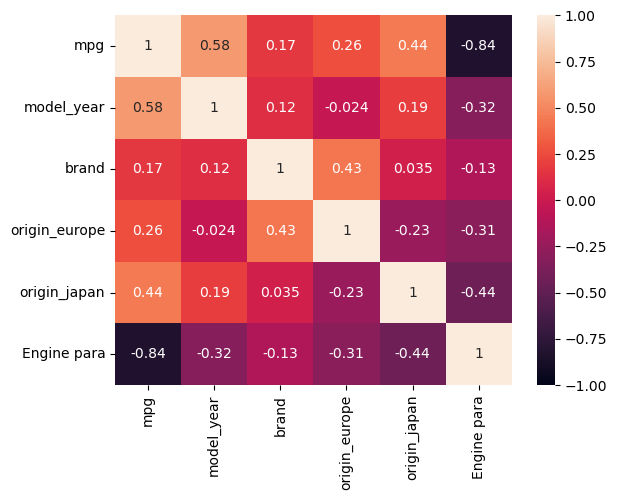

In [937]:
sns.heatmap(mpg.corr(),vmax=1,vmin=-1,annot=True)

In [938]:
# As there is some kind of multicollinearity ,So we can expact the condition no. to be greater then 1000.

In [939]:
# Fit a model
x_train_c=sma.add_constant(x_train)
x_test_c=sma.add_constant(x_test)

base_model = sma.OLS(y_train,x_train_c).fit()
base_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.1
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.88e-112
Time:                        12:23:04   Log-Likelihood:                -834.36
No. Observations:                 318   AIC:                             1681.
Df Residuals:                     312   BIC:                             1703.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -16.3297      4.683     -3.487      0.001     -25.544      -7.116
model_year        0.7291      0.056     12.938      0.000       0.618       0.840
brand            -0.0002      0.005     -0.032      0.974      -0.010       0.010
origin_europe     1.8539      0.656      2.827      0.005       0.564       3.144
origin_japan      2.5087      0.628      3.997      0.000       1.274       3.744
Engine para      -0.0050      0.000    -18.804      0.000      -0.005      -0.004
==============================================================================
Omnibus:                       38.395   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.127
Skew:                           0.665   Prob(JB):                     8.01e-17
Kurtosis:                       4.956   Cond. No.                     8.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [940]:
# Assumption - Linearity : met

# ho : Variables are linear 
# ha : Variables are not linear 

from statsmodels.stats.diagnostic import linear_rainbow

p_val = linear_rainbow(base_model)[1]

if p_val < 0.05:
    print('Reject Ho:')
else:
    print('Fail to reject ho:')

Fail to reject ho:


In [941]:
# Assumption : Autocorrelation : met 
# Durbin watson = 1.989

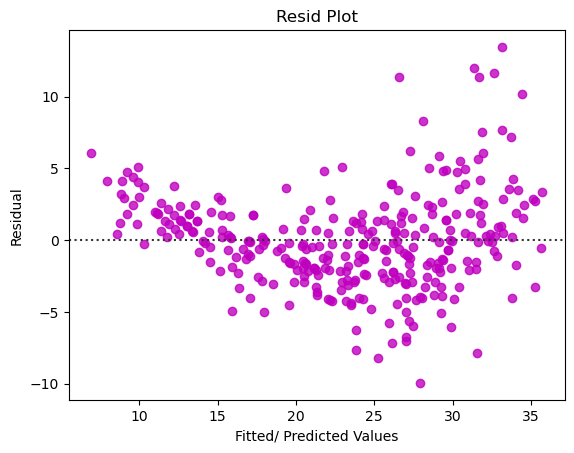

In [942]:
# Assumption : Homoskedasticity   : Not met 
# Assumption of Homoskedasticity

sns.residplot(x=base_model.fittedvalues,y=base_model.resid,color='m')
plt.xlabel('Fitted/ Predicted Values')
plt.ylabel('Residual')
plt.title('Resid Plot')
plt.show()

In [943]:
# Breusch pagan test

# ho: The variance is same : Homoskedasticity
# ha: The variance is not same : Heteresckedastic

p_val = sma.stats.diagnostic.het_breuschpagan(resid=base_model.resid,exog_het=x_train_c)[1]

if p_val < 0.05:
    print('Reject Ho:')
else:
    print('Fail to reject ho:')

Reject Ho:


In [944]:
# Assumption Normality  : Not Met 

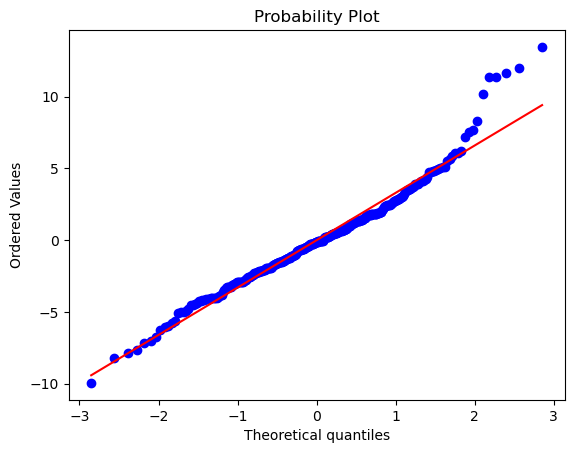

In [945]:
import scipy.stats as stats

stats.probplot(base_model.resid,plot=plt)
plt.show()

In [946]:
# Shapiro wilk test (N < 5000)

# ho: The data is normal
# ha: The data is not normal

p_val = stats.shapiro(base_model.resid)[1]

if p_val < 0.05:
    print('Reject Ho:')
else:
    print('Fail to reject ho:')

Reject Ho:


In [947]:
## Summary 
# Assumption 1 : Number target : Met
# Assumption 2 : Multicollinearity : Not Met ( category )
# Assumption 3 : Linearity : Met 
# Assumption 4 : Autocollinearity : Met 
# Assumption 5 : Homoskedasticity : not met 
# Assumption 6 : Normal residuals : Not Met 

In [948]:
# As per p values these are significane order

base_model.pvalues.sort_values()

Engine para      2.878881e-53
model_year       6.019365e-31
origin_japan     8.008617e-05
const            5.584983e-04
origin_europe    5.003131e-03
brand            9.742417e-01
dtype: float64

## Validation

In [949]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error


In [950]:
def validation(test,pred,data):
    r2 = r2_score(test,pred)
    print('R Squared:',r2)
    
    n= data.shape[0]
    k= data.shape[1]
    r2_adj = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adj R Square:',r2_adj)
    print('MSE',mean_squared_error(test,pred))
    print('RMSE',np.sqrt(mean_squared_error(test,pred)))
    print('MAE',mean_absolute_error(test,pred))
    print('MAPE',mean_absolute_percentage_error(test,pred))

In [951]:
# Train Dataset

pred_train = base_model.predict(x_train_c)

validation(y_train,pred_train,x_train_c)

R Squared: 0.8162102340487231
Adj R Square: 0.812664450782782
MSE 11.130572049853575
RMSE 3.3362511970553976
MAE 2.479379683514325
MAPE 0.11227065242965484


In [952]:
# Test Dataset
pred_test = base_model.predict(x_test_c)

validation(y_test,pred_test,x_test_c)

R Squared: 0.814147449926488
Adj R Square: 0.7988718978656515
MSE 11.48863219588327
RMSE 3.3894884858756003
MAE 2.5644480612875946
MAPE 0.11547652921581544


In [953]:
# it seems that the model is good fit or very lil variance 

## Make the prediction

In [954]:
# lets assume some input data

In [955]:
original = sns.load_dataset('mpg')
original

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [965]:
# lets suppose user has provided the data and we have to predcted the value according to my model .


original 
    
cylinders = 6
displacement= 200
horsepower= 180 
weight = 3500
acceleration= 10
model_year= 80
origin = 'usa'
name = 'ford'

In [966]:
# How my model take the values and according to this it will provide prediction 

Engine_para = cylinders+displacement+horsepower+weight+acceleration
model_year = 80
origin_japan = 0
origin_europe = 0
name = 51

In [968]:
base_model.predict(np.array([1,80,51,0,0,Engine_para]))

array([22.61788461])

* So this the predicted milage of the car according the user provided information.

End of this Data .